# INTRODUCTION

We try to predict the genetic disorder of patients based on multiple features

# IMPORT & SETUP

In [421]:
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# from matplotlib.gridspec import GridSpec
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LeakyReLU
# from tensorflow.keras.activations import linear, relu, sigmoid
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, mean_absolute_error, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# THE DATASET

##### Features: 
###### We see here an example entry from the dataset, we count 45 features, two of which are target features
| **Column name**                                  | **Column description**                                                                                                                    |
| ------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------- |
| Patient Id                                       | Represents the unique identification number of a patient                                                                                  |
| Patient Age                                      | Represents the age of a patient                                                                                                           |
| Genes in mother's side                           | Represents a gene defect in a patient's mother                                                                                            |
| Inherited from father                            | Represents a gene defect in a patient's father                                                                                            |
| Maternal gene                                    | Represents a gene defect in the patient's maternal side of the family                                                                     |
| Paternal gene                                    | Represents a gene defect in a patient's paternal side of the family                                                                       |
| Blood cell count (mcL)                           | Represents the blood cell count of a patient                                                                                              |
| Patient First Name                               | Represents a patient's first name                                                                                                         |
| Family Name                                      | Represents a patient's family name or surname                                                                                             |
| Father's name                                    | Represents a patient's father's name                                                                                                      |
| Mother's age                                     | Represents a patient's mother's name                                                                                                      |
| Father's age                                     | Represents a patient's father's age                                                                                                       |
| Institute Name                                   | Represents the medical institute where a patient was born                                                                                 |
| Location of Institute                            | Represents the location of the medical institute                                                                                          |
| Status                                           | Represents whether a patient is deceased                                                                                                  |
| Respiratory Rate (breaths/min)                   | Represents a patient's respiratory breathing rate                                                                                         |
| Heart Rate (rates/min)                           | Represents a patient's heart rate                                                                                                         |
| Test 1 - Test 5                                  | Represents different (masked) tests that were conducted on a patient                                                                      |
| Parental consent                                 | Represents whether a patient's parents approved the treatment plan                                                                        |
| Follow-up                                        | Represents a patient's level of risk (how intense their condition is)                                                                     |
| Gender                                           | Represents a patient's gender                                                                                                             |
| Birth asphyxia                                   | Represents whether a patient suffered from birth asphyxia                                                                                 |
| Autopsy shows birth defect (if applicable)       | Represents whether a patient's autopsy showed any birth defects                                                                           |
| Place of birth                                   | Represents whether a patient was born in a medical institute or home                                                                      |
| Folic acid details (peri-conceptional)           | Represents the periconceptional folic acid supplementation details of a patient                                                           |
| H/O serious maternal illness                     | Represents an unexpected outcome of labor and delivery that resulted in significant short or long-term consequences to a patient's mother |
| H/O radiation exposure (x-ray)                   | Represents whether a patient has any radiation exposure history                                                                           |
| H/O substance abuse                              | Represents whether a parent has a history of drug addiction                                                                               |
| Assisted conception IVF/ART                      | Represents the type of treatment used for infertility                                                                                     |
| History of anomalies in previous pregnancies     | Represents whether the mother had any anomalies in her previous pregnancies                                                               |
| No. of previous abortion                         | Represents the number of abortions that a mother had                                                                                      |
| Birth defects                                    | Represents whether a patient has birth defects                                                                                            |
| White Blood cell count (thousand per microliter) | Represents a patient's white blood cell count                                                                                             |
| Blood test result                                | Represents a patient's blood test results                                                                                                 |
| Symptom 1 - Symptom 5                            | Represents (masked) different types of symptoms that a patient had                                                                        |
| Genetic Disorder                                 | Represents the genetic disorder that a patient has                                                                                        |
| Disorder Subclass                                | Represents the subclass of the disorder                                                                                                   |

In [142]:
file_path = 'dataset/train.csv'
data = pd.read_csv(file_path)
data.columns.to_list()

['Patient Id',
 'Patient Age',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Blood cell count (mcL)',
 'Patient First Name',
 'Family Name',
 "Father's name",
 "Mother's age",
 "Father's age",
 'Institute Name',
 'Location of Institute',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Test 1',
 'Test 2',
 'Test 3',
 'Test 4',
 'Test 5',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'No. of previous abortion',
 'Birth defects',
 'White Blood cell count (thousand per microliter)',
 'Blood test result',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Genetic Disorder',
 'Disorder Subclass']

##### Target features

In [171]:
disease_col = 'Genetic Disorder'
subclass_col = 'Disorder Subclass'
grouped_data = data.groupby([disease_col, subclass_col]).size().reset_index(name='Count')
num_combinations = grouped_data.shape[0]

print("Number of entries in the dataset:", len(data))

print("\nUnique Combinations of Disease and Subclass:")
grouped_data.head(10)

Number of entries in the dataset: 22083

Unique Combinations of Disease and Subclass:


,Genetic Disorder,Disorder Subclass,Count
0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,587
1,Mitochondrial genetic inheritance disorders,Leigh syndrome,4683
2,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy,3971
3,Multifactorial genetic inheritance disorders,Alzheimer's,133
...,...,...,...
5,Multifactorial genetic inheritance disorders,Diabetes,1653
6,Single-gene inheritance diseases,Cystic fibrosis,3145
7,Single-gene inheritance diseases,Hemochromatosis,1228
8,Single-gene inheritance diseases,Tay-Sachs,2556


###### There are 3 genetic disorders, each with 3 subclasses. 
###### We notice that there are null entries in the target features, these will not be able to controbute to the model

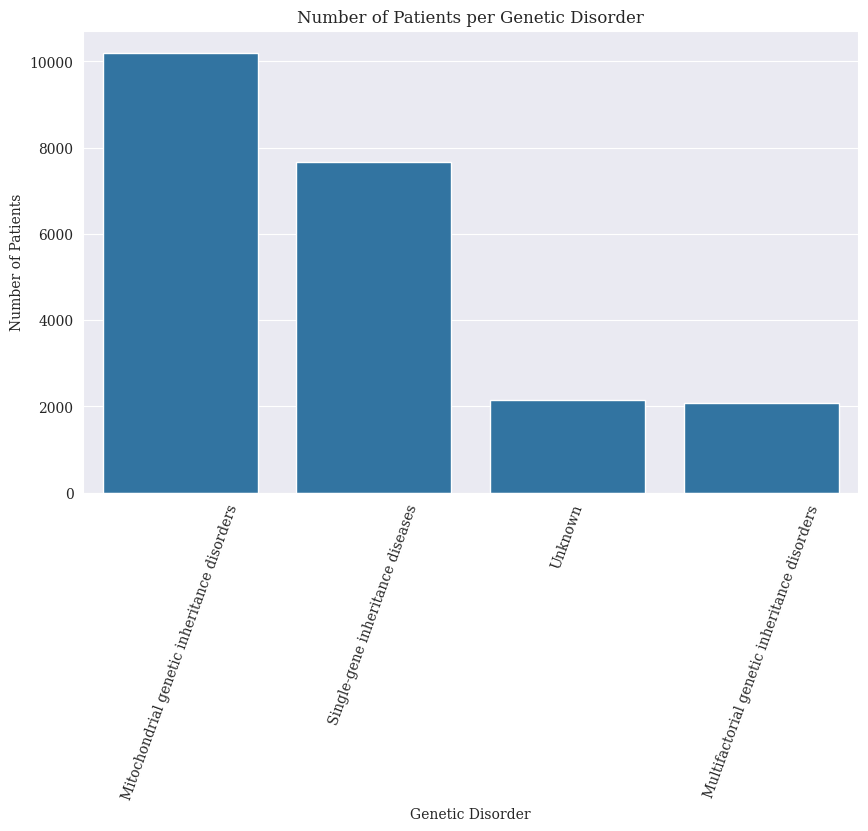

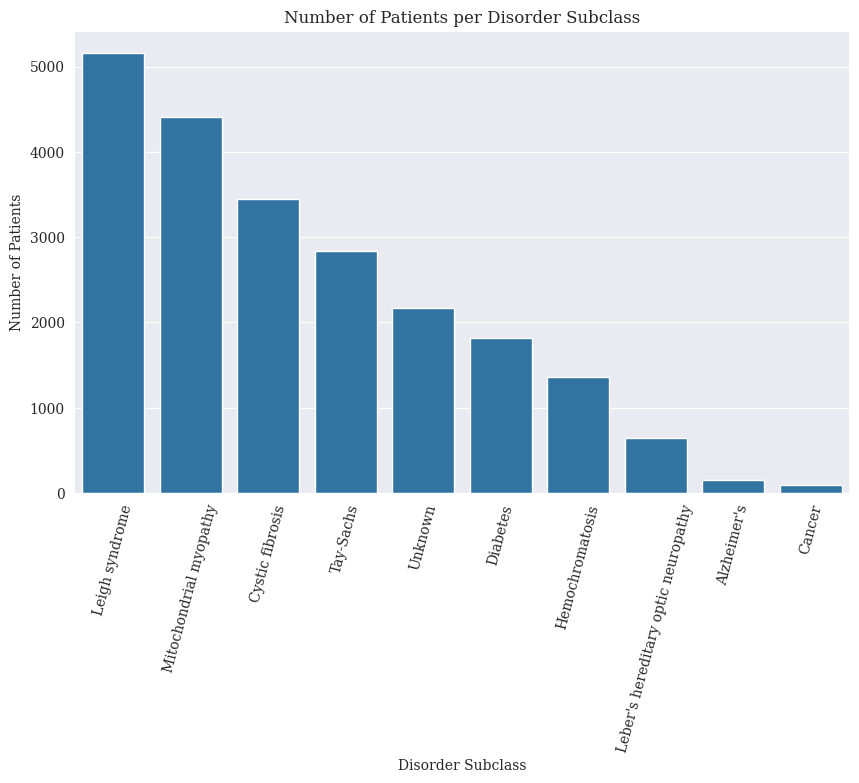

In [172]:
graph_data = data.copy().fillna(value={disease_col: "Unknown", subclass_col: "Unknown"})
# Counting patients for each disease and subclass
disease_count = graph_data[disease_col].value_counts()
subclass_count = graph_data[subclass_col].value_counts()

# Plotting Bar Chart for Diseases
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_count.index, y=disease_count.values)
plt.title('Number of Patients per Genetic Disorder')
plt.ylabel('Number of Patients')
plt.xlabel('Genetic Disorder')
plt.xticks(fontsize=10, rotation=70)
plt.show()

# Plotting Bar Chart for Subclasses
plt.figure(figsize=(10, 6))
sns.barplot(x=subclass_count.index, y=subclass_count.values)
plt.title('Number of Patients per Disorder Subclass')
plt.ylabel('Number of Patients')
plt.xlabel('Disorder Subclass')
plt.xticks(fontsize=10, rotation=75)
plt.show()

##### We can change most of the unknown Genetic Disorders to be of the correct type

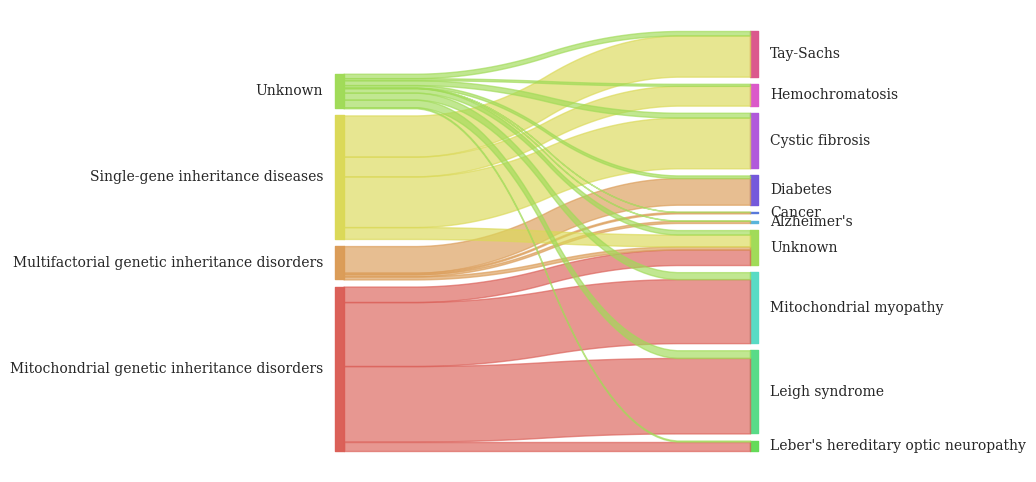

In [173]:
from pySankey import sankey

grouped_subclass = graph_data.groupby(["Genetic Disorder", "Disorder Subclass"], sort='Genetic Disorder',
                                      as_index=False).size()
count_class = graph_data.groupby(["Genetic Disorder"], sort='Genetic Disorder', as_index=False).size()

sankey.sankey(
    grouped_subclass["Genetic Disorder"], grouped_subclass["Disorder Subclass"], rightWeight=grouped_subclass['size'],
    leftWeight=grouped_subclass['size'], aspect=10, figure_name="Sankey for Genetic Disorder",
    fontsize=10
)

# PRE-PROCESSING

##### We first start by removing all the entries where both taget features are unknown.

In [619]:
print("Number of entries in the dataset before cleaning:", len(data))

grouped_data = data.groupby(['Genetic Disorder', 'Disorder Subclass'], dropna=False, as_index=False).size()
na_set = grouped_data['Genetic Disorder'].isna() & grouped_data['Disorder Subclass'].isna()
null_both_count = grouped_data[na_set]['size'].iloc[0]

print(f"Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': {null_both_count}")

data_1 = data.dropna(subset=["Genetic Disorder", "Disorder Subclass"], how='all')
print("Number of entries after cleaning dataset =", data_1.shape[0])

grouped_data = data_1.groupby(['Genetic Disorder', 'Disorder Subclass'], dropna=False, as_index=False).size()
na_set = grouped_data['Genetic Disorder'].isna() & grouped_data['Disorder Subclass'].isna()

null_both_count = grouped_data[na_set]['size'].size
print(f"Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': {null_both_count}")

data_1

Number of entries in the dataset before cleaning: 22083
Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': 278
Number of entries after cleaning dataset = 21805
Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': 0


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


We see that there are still some entries with null values in the Genetic Disorder column, we will try to fill them using the Disorder Subclass column

In [620]:
pairs = data_1.groupby(["Disorder Subclass", "Genetic Disorder"], sort='Genetic Disorder', as_index=False).any()[
    ['Disorder Subclass', 'Genetic Disorder']]
data_1.loc[data_1['Genetic Disorder'].isna()] = data_1[
    data_1['Genetic Disorder'].isna()].reset_index().merge(
    pairs, on='Disorder Subclass', how='inner',
    suffixes=('_y', '')).drop('Genetic Disorder_y', axis=1).set_index("index")

# data_1 = data_1.loc[~data_1['Disorder Subclass'].isna()]

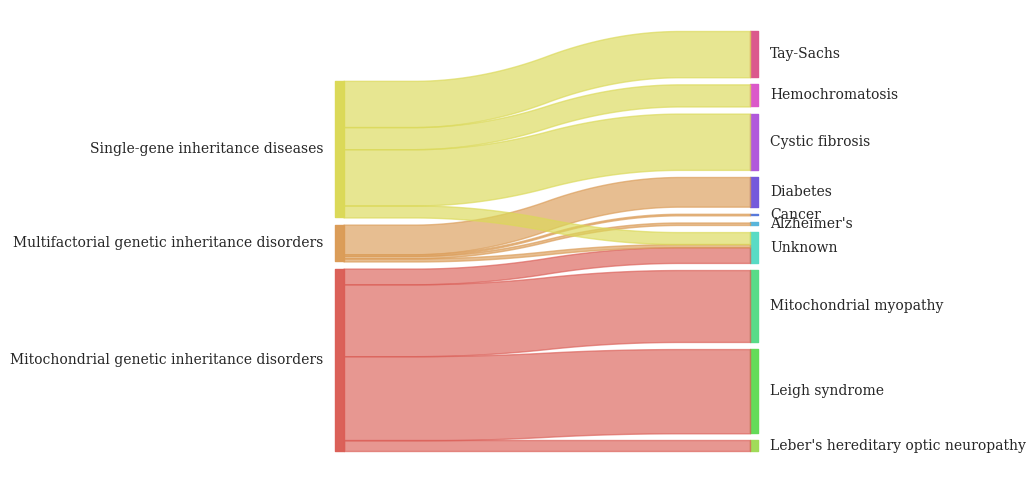

In [621]:
from pySankey import sankey

grouped_subclass = data_1.fillna(value={disease_col: "Unknown", subclass_col: "Unknown"}).groupby(
    ["Genetic Disorder", "Disorder Subclass"], sort='Genetic Disorder',
    as_index=False).size()
count_class = data_1.fillna(value={disease_col: "Unknown", subclass_col: "Unknown"}).groupby(["Genetic Disorder"],
                                                                                             sort='Genetic Disorder',
                                                                                             as_index=False).size()

sankey.sankey(
    grouped_subclass["Genetic Disorder"], grouped_subclass["Disorder Subclass"], rightWeight=grouped_subclass['size'],
    leftWeight=grouped_subclass['size'], aspect=10, figure_name="Sankey for Genetic Disorder",
    fontsize=10
)

Let's look at each feature and see if we can classify each of their categories into floats and handle missing data
Column: [unique options list]: number of null values

##### We remove all features that don't contribute directly to the training model or features that don't provide enough information (Test 1-5)

In [633]:
# List of columns to be dropped
columns_to_drop = ['Institute Name', 'Location of Institute', "Father's name", "Place of birth"
    , 'Patient First Name', 'Family Name', 'Patient Id', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
                   'Parental consent']

data_1 = data_1.drop(columns=columns_to_drop)

In [634]:
total = 0
for column in data_1.columns:
    unique_values = data_1[column].unique()
    nan_counts = data_1[column].isnull().sum()
    total = total + nan_counts
    print(f"{column}: {unique_values}: {nan_counts}\n")

print(total)

Patient Age: [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]: 1408

Genes in mother's side: ['Yes' 'No']: 0

Inherited from father: ['No' 'Yes' nan]: 304

Maternal gene: ['Yes' 'No' nan]: 2758

Paternal gene: ['No' 'Yes']: 0

Blood cell count (mcL): [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]: 0

Mother's age: [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 29. 31. 27. 43. 39.]: 5943

Father's age: [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]: 5866

Status: ['Alive' 'Deceased']: 0

Respiratory Rate (breaths/min): ['Normal (30-60)' 'Tachypnea' nan]: 2113

Heart Rate (rates/min: ['Normal' 'Tachycardia' nan]: 2065

Follow-up: ['High' 'Low' nan]: 2132

Gender: [nan 'Male' 'Female' 'Ambiguous']: 2134

Birth asphyxia: [nan 0.0 2.0 1.

##### We see that there are still some features with missing values, we will try to imput them

In [681]:
label_encoder = LabelEncoder()

def encode(x: pd.Series):
    # Patient age --> raplce nan by median
    if x.dtype == 'object':
        return label_encoder.fit_transform(x.astype(str))
    return x

transformed_data = data_1.apply(encode)
transformed_data.dropna(axis=0, inplace=True)

In [676]:
transformed_data

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
8,11.0,0,0,1,0,5.209058,45.0,44.0,0,1,...,0,6.669552,4,1.0,1.0,1.0,0.0,1.0,0,6
9,4.0,0,1,1,1,4.752272,44.0,42.0,0,1,...,0,6.397702,0,0.0,0.0,1.0,1.0,1.0,1,3
12,1.0,1,1,0,0,4.612265,50.0,56.0,1,0,...,1,7.995115,4,1.0,1.0,0.0,1.0,0.0,0,6
14,6.0,1,0,1,0,4.620420,41.0,20.0,0,1,...,0,3.000000,4,1.0,0.0,1.0,0.0,1.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22070,3.0,1,0,0,0,4.671013,40.0,39.0,1,0,...,0,4.967410,1,0.0,1.0,1.0,1.0,1.0,1,3
22072,6.0,0,0,2,0,4.828224,34.0,45.0,1,1,...,1,5.673544,0,1.0,0.0,0.0,1.0,0.0,0,7
22078,4.0,1,1,1,0,5.258298,35.0,64.0,1,0,...,0,6.584811,1,0.0,0.0,1.0,0.0,0.0,0,6
22082,11.0,1,0,0,0,4.738067,32.0,62.0,1,0,...,1,11.188371,3,1.0,0.0,1.0,1.0,1.0,1,3


In [678]:
knn_imputer = KNNImputer(n_neighbors=100, weights="uniform")
data_array = knn_imputer.fit_transform(transformed_data)

In [682]:
data_array = transformed_data.to_numpy()

In [687]:
# Splitting the complete_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_array[:, 0:29], data_array[:, 30], test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators=1000)
sel = SelectFromModel(model, threshold='median')
sel.fit(X_train, y_train)
# Initialize and train the model`
model.fit(X_train[:, sel.get_support()], y_train)

y_pred = model.predict(X_test[:, sel.get_support()])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.4783895796329189


In [672]:
data_1.iloc[:, sel.get_support(indices=True)]
print(sel.estimator_.feature_importances_)

[0.06276638 0.01309569 0.01520642 0.02117636 0.01407506 0.08526919
 0.07670097 0.07895079 0.01304541 0.02232183 0.02179371 0.02233018
 0.03068426 0.02972212 0.02735693 0.02220638 0.02208827 0.01970501
 0.0293925  0.02196089 0.02248156 0.04332573 0.02216272 0.08171073
 0.03611978 0.02911772 0.03374018 0.03813105 0.04336218]


In [660]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=20, min_samples_split=20)
sel = SelectFromModel(model, threshold='median')
sel.fit(X_train, y_train)
# Initialize and train the model`
model.fit(X_train[:, sel.get_support()], y_train)

y_pred = model.predict(X_test[:, sel.get_support()])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.5691355193762898


In [685]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

Scaler_Function = StandardScaler()
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data_array[:, 0:29], data_array[:, 30], test_size=0.2, random_state=42)

X_Train = Scaler_Function.fit_transform(X_Train)
X_Test = Scaler_Function.fit_transform(X_Test)
lj_m = LogisticRegression(solver="liblinear").fit(X_Train,Y_Train)
gnb_m = GaussianNB().fit(X_Train,Y_Train)
knnc_m = KNeighborsClassifier().fit(X_Train,Y_Train)
cartc_m = DecisionTreeClassifier(random_state=42).fit(X_Train,Y_Train)
rfc_m = RandomForestClassifier(random_state=42,verbose=False).fit(X_Train,Y_Train)
gbmc_m = GradientBoostingClassifier(verbose=False).fit(X_Train,Y_Train)
xgbc_m = XGBClassifier().fit(X_Train,Y_Train)
lgbmc_m = LGBMClassifier().fit(X_Train,Y_Train)
model_m = [lj_m,gnb_m,knnc_m,cartc_m,rfc_m,gbmc_m, xgbc_m, lgbmc_m]
for model in model_m:
    name = model.__class__.__name__
    predict = model.predict(X_Test)
    R2CV = cross_val_score(model,X_Test,Y_Test,cv=10,verbose=False).mean()
    error = -cross_val_score(model,X_Test,Y_Test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(Y_Test,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 6753, number of used features: 29
[LightGBM] [Info] Start training from score -0.662667
[LightGBM] [Info] Start training from score -2.265234
[LightGBM] [Info] Start training from score -0.965692
LogisticRegression: 
----------
ACC--> 0.49496743635287155
R2CV--> 0.4819385742462666
MEAN SQUARED ERROR--> 1.3021794484108646
------------------------------
GaussianNB: 
----------
ACC--> 0.5044404973357016
R2CV--> 0.47366159481544096
MEAN SQUARED ERROR--> 1.303296046982644
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.4659561870929544
R2CV--> 0.4452345731191885
MEAN SQUARED ERROR--> 1.3475306930543673
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.46477205447010067
R2CV--> 0.444040574809

Let's try to impute the missing values by predicting them from the complete subset

In [340]:
# clean_df = data_1
# #clean_df['Genetic Disorder'] = clean_df['Genetic Disorder'].replace('Unknown', np.nan)
# #clean_df['Disorder Subclass'] = clean_df['Disorder Subclass'].replace('Unknown', np.nan)
# 
# clean_df = clean_df.fillna("unknown")
# 
# label_encoder = LabelEncoder()
# clean_df['Genetic Disorder'] = label_encoder.fit_transform(clean_df['Genetic Disorder'].astype(str))
# 
# clean_df['Disorder Subclass'] = label_encoder.fit_transform(clean_df['Disorder Subclass'].astype(str))
# 
# for column in clean_df.columns:
#     unique_values = clean_df[column].unique()
#     nan_counts = clean_df[column].isnull().sum()
# 
#     #print(f"{column}: {unique_values}: {nan_counts}\n")
# 
# subset = data_1.dropna()
# 
# subset['Genetic Disorder'] = label_encoder.fit_transform(subset['Genetic Disorder'].astype(str))
# subset['Genetic Disorder'] = subset['Genetic Disorder'].astype(float)
# 
# subset['Disorder Subclass'] = label_encoder.fit_transform(subset['Disorder Subclass'].astype(str))
# subset['Disorder Subclass'] = subset['Disorder Subclass'].astype(float)
# 
# for column in subset.columns:
#     unique_values = subset[column].unique()
#     nan_counts = subset[column].isnull().sum()
# 
#     print(f"{column}: {unique_values}: {nan_counts}\n")
# 
# X = subset.drop(['Genetic Disorder', 'Disorder Subclass'], axis=1)
# y = subset['Genetic Disorder']  # target variable

# Splitting the complete_data into training and testing sets

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

# Predicting the missing values
# missing_data = clean_df[clean_df['Inherited from father'] == "unknown"]
#predicted_values = model.predict(missing_data.drop('Inherited from father', axis=1))
#predicted_values

#count_1s = np.sum(predicted_values == 1.0)
#count_0s = np.sum(predicted_values == 0.0)


#print(count_0s, count_1s)

Model Accuracy: 0.5302535777052473


## testing some things out


In [572]:
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

label_encoder = LabelEncoder()
file_path = 'data/train.csv'
datadata = pd.read_csv(file_path)

#----------------------------------%%%%%%%%%%%%%--------------------------------------#

# remove rows where both targets NaN
datadata = datadata.dropna(subset=['Genetic Disorder', 'Disorder Subclass'], how='all')

# remove irrelevant features
columns_to_drop = ['Institute Name', 'Location of Institute', "Father's name",
                   'Patient First Name', 'Family Name', 'Patient Id', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']
datadata = datadata.drop(columns=columns_to_drop)

#----------------------------------%%%%%%%%%%%%%--------------------------------------#


# Patient age --> raplce nan by median
imputer = SimpleImputer(strategy='median')
datadata['Patient Age'] = imputer.fit_transform(datadata[['Patient Age']])

# mother age --> replace nan by median
datadata["Mother\'s age"] = imputer.fit_transform(datadata[['Mother\'s age']])

# father age --> replace nan by median
datadata["Father\'s age"] = imputer.fit_transform(datadata[['Father\'s age']])

# autopsy --> yes-1   no, not applicable, nan-0
datadata['Autopsy shows birth defect (if applicable)'] = datadata['Autopsy shows birth defect (if applicable)'].replace(
    {'Yes': 1.0, 'No': 0.0, 'Not applicable': 0.0}).fillna(0.0)

# nr of abortion --> replace nan by median
datadata['No. of previous abortion'] = imputer.fit_transform(datadata[['No. of previous abortion']])

# white blood cell count --> replace nan by mean
imputer_mean = SimpleImputer(strategy='mean')
datadata['White Blood cell count (thousand per microliter)'] = imputer_mean.fit_transform(
    datadata[['White Blood cell count (thousand per microliter)']])

# parental consent --> yes-1 nan-0
datadata['Parental consent'] = datadata['Parental consent'].fillna(0.0)
datadata['Parental consent'] = datadata['Parental consent'].replace('Yes', 1.0)

# h/o susbtance abuse --> yes-1   no,-,nan- 0  
datadata['H/O substance abuse'] = datadata['H/O substance abuse'].replace(
    {'No': 0.0, 'Yes': 1.0, 'Not applicable': 2.0, '-': 0.0})

# Birth asphyxia --> no, no record, not available,0   yes-1
datadata['Birth asphyxia'] = datadata['Birth asphyxia'].replace(
    {'No': 0.0, 'No record': 2.0, 'Not available': 0.0, 'Yes': 1.0})

# h/o radiation -->  yes-1   no,nan, NA,--0  
datadata['H/O radiation exposure (x-ray)'] = datadata['H/O radiation exposure (x-ray)'].replace(
    {'No': 0.0, '-': 0.0, 'Not applicable': 0.0, 'Yes': 1.0})

#----------------------------------%%%%%%%%%%%%%--------------------------------------#


datadata = datadata.fillna(-1)

# Apply LabelEncoder to each categorical column
for column in datadata.columns:
    if datadata[column].dtype == 'object':
        # Store original -1 values to a temporary variable
        original_minus_ones = datadata[column] == -1

        datadata[column] = datadata[column].replace(-1, 'temp')

        # Apply LabelEncoder
        datadata[column] = label_encoder.fit_transform(datadata[column])
        datadata[column] = datadata[column].astype(float)

        datadata.loc[original_minus_ones, column] = -1.0

#----------------------------------%%%%%%%%%%%%%--------------------------------------#

for column in datadata.columns:
    unique_values = datadata[column].unique()
    nan_counts = datadata[column].isnull().sum()

    print(f"{column}: {unique_values}: {nan_counts}\n")

#----------------------------------PREDICTION--------------------------------------#


training_data = datadata.drop('Disorder Subclass', axis=1)

# Define the features (X) and target (y)
X = training_data.drop('Genetic Disorder', axis=1)
y = training_data['Genetic Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#----------------------------------PREDICTION--------------------------------------#

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Standardizing the data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputing with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Applying one-hot encoding
])

# Bundling transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Evaluating the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_accuracy = np.mean(cv_scores)

cv_accuracy



Patient Age: [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. 10.  5. 13.  8.  9.]: 0

Genes in mother's side: [1. 0.]: 0

Inherited from father: [ 0.  1. -1.]: 0

Maternal gene: [ 1.  0. -1.]: 0

Paternal gene: [0. 1.]: 0

Blood cell count (mcL): [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]: 0

Mother's age: [35. 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 22. 33. 20. 26. 29. 31. 27. 43. 39.]: 0

Father's age: [42. 23. 22. 63. 44. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52. 28.
 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59. 47.
 38. 54. 21. 37. 36. 33. 46. 40. 45.]: 0

Status: [0. 1.]: 0

Respiratory Rate (breaths/min): [ 0.  1. -1.]: 0

Heart Rate (rates/min: [ 0.  1. -1.]: 0

Parental consent: [1. 0.]: 0

Follow-up: [ 0.  1. -1.]: 0

Gender: [-1.  2.  1.  0.]: 0

Birth asphyxia: [-1.  0.  2.  1.]: 0

Autopsy shows birth defect (if applicable): [0. 1.]: 0

Place of birth: [ 1. -1.  0.]: 

0.5145611140912068

In [61]:
label_encoder = LabelEncoder()
file_path = 'data/train.csv'
datadata = pd.read_csv(file_path)

#----------------------------------%%%%%%%%%%%%%--------------------------------------#

# remove rows where both targets NaN
datadata = datadata.dropna(subset=['Genetic Disorder', 'Disorder Subclass'], how='all')

# remove irrelevant features
columns_to_drop = ['Institute Name', 'Location of Institute', "Father's name",
                   'Patient First Name', 'Family Name', 'Patient Id',
                   'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']
datadata = datadata.drop(columns=columns_to_drop)

#----------------------------------%%%%%%%%%%%%%--------------------------------------#


# Patient age --> raplce nan by median
imputer = SimpleImputer(strategy='median')
datadata['Patient Age'] = imputer.fit_transform(datadata[['Patient Age']])

# mother age --> replace nan by median
datadata["Mother\'s age"] = imputer.fit_transform(datadata[['Mother\'s age']])

# father age --> replace nan by median
datadata["Father\'s age"] = imputer.fit_transform(datadata[['Father\'s age']])

# autopsy --> yes-1   no, not applicable, nan-0
datadata['Autopsy shows birth defect (if applicable)'] = datadata['Autopsy shows birth defect (if applicable)'].replace(
    {'Yes': 1.0, 'No': 0.0, 'Not applicable': 0.0}).fillna(0.0)

# nr of abortion --> replace nan by median
datadata['No. of previous abortion'] = imputer.fit_transform(datadata[['No. of previous abortion']])

# white blood cell count --> replace nan by mean
imputer_mean = SimpleImputer(strategy='mean')
datadata['White Blood cell count (thousand per microliter)'] = imputer_mean.fit_transform(
    datadata[['White Blood cell count (thousand per microliter)']])

# parental consent --> yes-1 nan-0
datadata['Parental consent'] = datadata['Parental consent'].fillna(0.0)
datadata['Parental consent'] = datadata['Parental consent'].replace('Yes', 1.0)

# h/o susbtance abuse --> yes-1   no,-,nan- 0  
datadata['H/O substance abuse'] = datadata['H/O substance abuse'].replace(
    {'No': 0.0, 'Yes': 2.0, 'Not applicable': 1.0, '-': 0.0})

# Birth asphyxia --> no, no record, not available,0   yes-1
datadata['Birth asphyxia'] = datadata['Birth asphyxia'].replace(
    {'No': 0.0, 'No record': 0.0, 'Not available': 1.0, 'Yes': 2.0})

# h/o radiation -->  yes-1   no,nan, NA,--0  
datadata['H/O radiation exposure (x-ray)'] = datadata['H/O radiation exposure (x-ray)'].replace(
    {'No': 0.0, '-': 0.0, 'Not applicable': 1.0, 'Yes': 2.0})

categorical_cols = datadata.select_dtypes(include=['object']).columns
mode_imputer = SimpleImputer(strategy='most_frequent')

for column in categorical_cols:
    datadata[column] = label_encoder.fit_transform(datadata[column])
    datadata[column] = datadata[column].astype(float)

datadata = datadata.fillna(-1)
#----------------------------------%%%%%%%%%%%%%--------------------------------------#

#----------------------------------%%%%%%%%%%%%%--------------------------------------#

for column in datadata.columns:
    unique_values = datadata[column].unique()
    nan_counts = datadata[column].isnull().sum()

    print(f"{column}: {unique_values}: {nan_counts}\n")

#----------------------------------PREDICTION--------------------------------------#


training_data = datadata.drop('Disorder Subclass', axis=1)

# Define the features (X) and target (y)
X = training_data.drop('Genetic Disorder', axis=1)
y = training_data['Genetic Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sorting the features by importance
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Displaying the feature importances
print(sorted_feature_importances)






Patient Age: [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. 10.  5. 13.  8.  9.]: 0

Genes in mother's side: [1. 0.]: 0

Inherited from father: [0. 1. 2.]: 0

Maternal gene: [1. 0. 2.]: 0

Paternal gene: [0. 1.]: 0

Blood cell count (mcL): [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]: 0

Mother's age: [35. 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 22. 33. 20. 26. 29. 31. 27. 43. 39.]: 0

Father's age: [42. 23. 22. 63. 44. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52. 28.
 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59. 47.
 38. 54. 21. 37. 36. 33. 46. 40. 45.]: 0

Status: [0. 1.]: 0

Respiratory Rate (breaths/min): [0. 1. 2.]: 0

Heart Rate (rates/min: [0. 1. 2.]: 0

Parental consent: [1. 0.]: 0

Follow-up: [0. 1. 2.]: 0

Gender: [3. 2. 1. 0.]: 0

Birth asphyxia: [-1.  0.  1.  2.]: 0

Autopsy shows birth defect (if applicable): [0. 1.]: 0

Place of birth: [1. 2. 0.]: 0

Folic acid details 